In [26]:
### 24 April 2025
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

KMeans(n_clusters=3, n_init=30, random_state=425)

––––––––––––––––––––


,Age,Spending_Score,Annual_Income
0,51.274725,61.802198,34.208791
1,32.853659,87.341463,79.975610
2,25.838235,42.750000,53.647059


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

Text(0.5, 1.0, 'Customer Segments with Centroids')

Text(0.5, 0, 'Annual Income')

Text(0, 0.5, 'Spending Score')

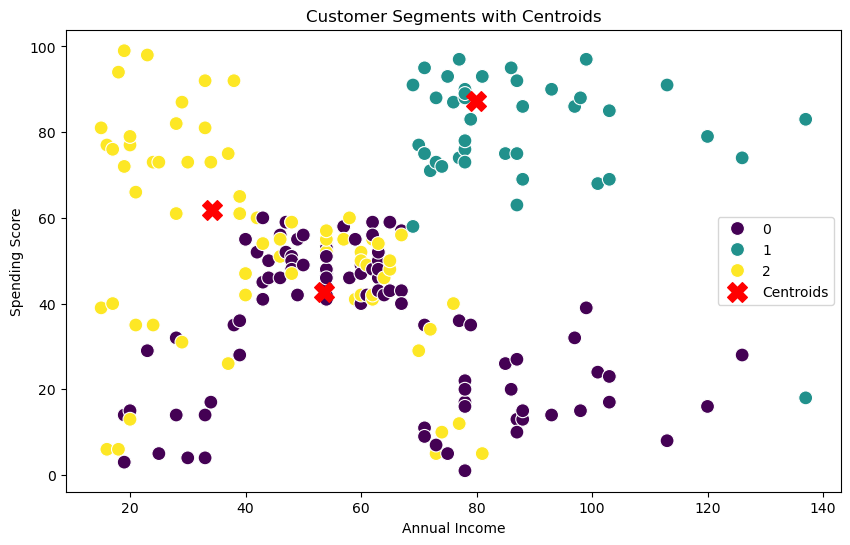

In [99]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Customer.csv')

# Select features
features = data[['Age', 'Annual_Income', 'Spending_Score']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set the number of clusters
k = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=425, n_init=30) # Added n_init for better convergence
kmeans.fit(scaled_features)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
data['cluster'] = labels

# Get the centroid coordinates
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
# centroids_df = pd.DataFrame(centroids, columns=['Annual_Income', 'Spending_Score', 'Age']) # Order matters here!
centroids_df = pd.DataFrame(centroids, columns=['Age', 'Spending_Score', 'Annual_Income']) # Order matters here!


print("––––––––––––––––––––")
centroids_df
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='cluster', palette='viridis', s=100)

# Plot the centroids
plt.scatter(centroids_df['Annual_Income'], centroids_df['Spending_Score'], marker='X', s=200, color='red', label='Centroids')

plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [51]:
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    print(f"Cluster {cluster} Summary:\n{cluster_data.describe()}\n")

Cluster 2 Summary:
       CustomerID        Age  Annual_Income  Spending_Score  cluster
count   63.000000  63.000000      63.000000       63.000000     63.0
mean    61.650794  25.142857      43.269841       56.507937      2.0
std     43.552400   5.599128      19.141415       21.572737      0.0
min      1.000000  18.000000      15.000000        5.000000      2.0
25%     23.000000  20.000000      24.500000       42.000000      2.0
50%     52.000000  24.000000      42.000000       55.000000      2.0
75%     97.000000  30.000000      60.000000       73.000000      2.0
max    163.000000  38.000000      81.000000       99.000000      2.0

Cluster 0 Summary:
       CustomerID        Age  Annual_Income  Spending_Score  cluster
count   96.000000  96.000000      96.000000       96.000000     96.0
mean    99.750000  50.406250      60.468750       33.343750      0.0
std     53.942855  10.349247      23.704298       17.734788      0.0
min      7.000000  25.000000      18.000000        1.000000     

In [ ]:
Cluster 1 Summary:

Count: 41 customers, the smallest segment.
Age: The average age is around 33, with most between 30 and 36. The age range is relatively contained (27 to 40).
Annual Income: This group has the highest average annual income, around $87,300, with the majority earning between $75,000 and $97,000. The income range is also high ($69,000 to $137,000).
Spending Score: The average spending score is the highest among the clusters, around 80. Most customers have scores between 74 and 90, with a good range from 18 to 97.

KMeans(n_clusters=3, n_init=10, random_state=42)

Text(0.5, 0, 'Age')

Text(0.5, 0.5, 'Annual Income')

Text(0.5, 0, 'Spending Score')

Text(0.5, 0.92, '3D Customer Segmentation')

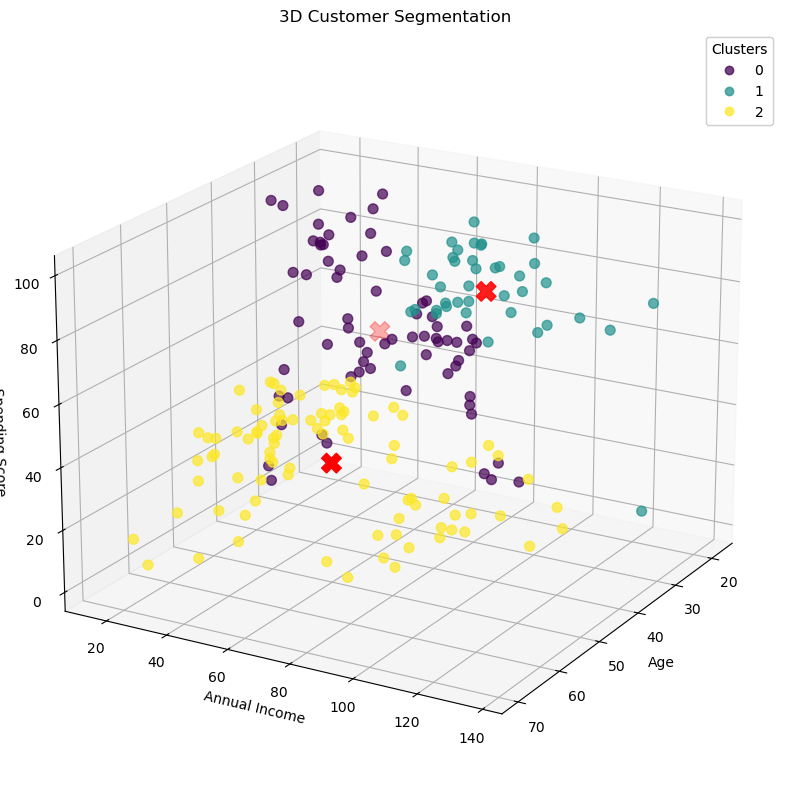

In [93]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Load the dataset
data = pd.read_csv('Customer.csv')

# Select features
features = data[['Age', 'Annual_Income', 'Spending_Score']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set the number of clusters
k = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
data['cluster'] = labels

# Get the centroid coordinates in the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df_3d = pd.DataFrame(centroids, columns=['Age', 'Annual_Income', 'Spending_Score'])

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points, colored by cluster
scatter = ax.scatter(data['Age'], data['Annual_Income'], data['Spending_Score'], c=data['cluster'], cmap='viridis', s=50, alpha=0.7)

# Plot the centroids
ax.scatter(centroids_df_3d['Age'], centroids_df_3d['Annual_Income'], centroids_df_3d['Spending_Score'], marker='X', s=200, color='red', label='Centroids')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Customer Segmentation')
ax.legend()

# Add a color bar for the clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Rotate the view for better perspective (optional)
ax.view_init(azim=30, elev=20)

plt.show()